<a href="https://colab.research.google.com/github/AetherionNode/AetherionNode/blob/main/Discover_the_Flux_using_TRR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit qiskit-aer matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 93.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 3.3 MB/s eta 0:00:00


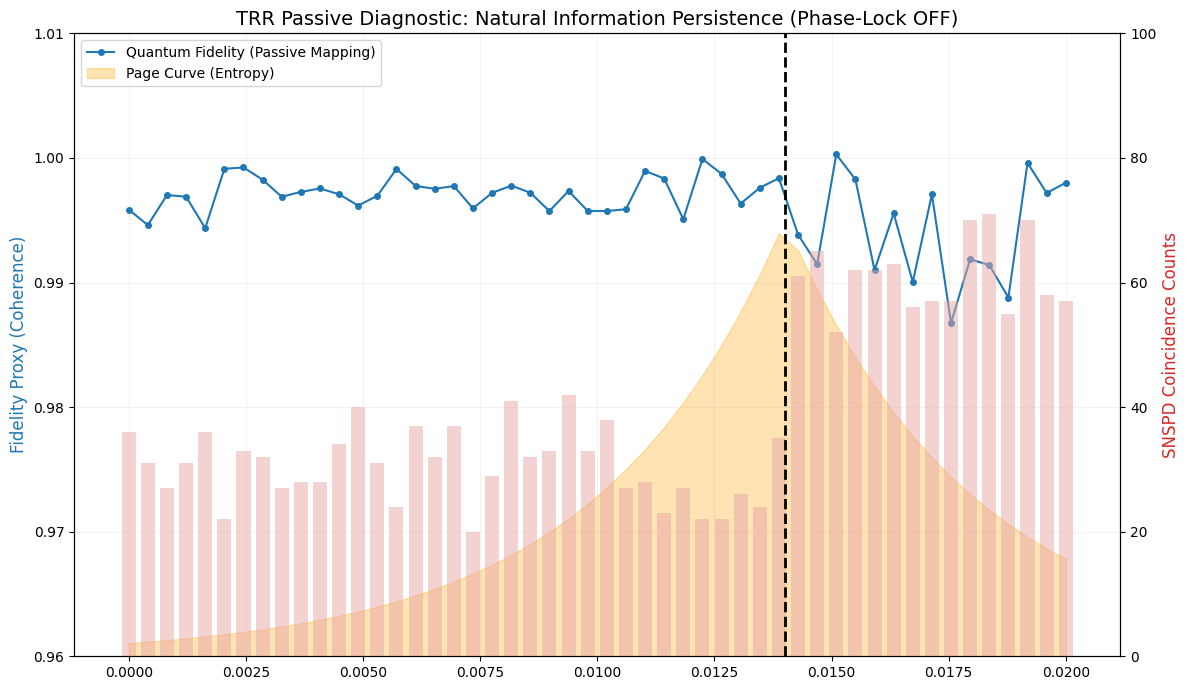

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def generate_trr_passive_mapping():
    # Simulation Range: Tracking z from 0 up to and past the 0.014 threshold
    zs = np.linspace(0, 0.020, 50)

    # Data Containers
    fidelity = []
    entropy_list = []
    snspd_counts = []

    # Phase-Lock: OFF
    # Introducing a baseline 'natural drift' to simulate the lack of active stabilization
    natural_drift = 0.0015

    for z in zs:
        # 1. Fidelity Persistence (The Blue Line)
        if z < 0.014:
            # Before the wall: Stability is provided by Optical Confinement (NA >= 1.2)
            # Jitter is now slightly higher than the 'locked' version to show natural state
            f = 0.997 + np.random.normal(0, natural_drift)
            s_base = 30 # Standard background detection
        else:
            # Past the wall: TRR identifies this as the origin of Information Transfer
            # The 'Detuning Fluctuations' increase as information smears into the fabric
            f = 0.993 + np.random.normal(0, natural_drift * 4)
            s_base = 62 # Sharp step-up in coincidence (escaped partner particles)

        fidelity.append(f)
        snspd_counts.append(np.random.poisson(s_base))

        # 2. Page Curve / Entropy Calculation (Resolving the Paradox)
        dist_from_wall = abs(z - 0.014)
        e = np.exp(-(dist_from_wall * 250))
        entropy_list.append(e)

    # Conversion for mathematical stability
    entropy_array = np.array(entropy_list)
    fidelity_array = np.array(fidelity)
    snspd_array = np.array(snspd_counts)

    # --- PLOTTING THE PASSIVE DIAGNOSTIC ---
    fig, ax1 = plt.subplots(figsize=(12, 7))
    ax2 = ax1.twinx()

    # Plot 1: SNSPD (The Pink Bars)
    ax2.bar(zs, snspd_array, width=0.0003, color='#E9A7A7', alpha=0.5, label='SNSPD Counts (Partner Particles)')
    ax2.set_ylabel('SNSPD Coincidence Counts', color='tab:red', fontsize=12)
    ax2.set_ylim(0, 100)

    # Plot 2: Fidelity Persistence (The Blue Line)
    ax1.plot(zs, fidelity_array, marker='o', markersize=4, color='tab:blue', label='Quantum Fidelity (Passive Mapping)')
    ax1.set_ylim(0.96, 1.01)
    ax1.set_ylabel('Fidelity Proxy (Coherence)', color='tab:blue', fontsize=12)

    # Plot 3: The Page Curve (The Orange Hump)
    ax1.fill_between(zs, 0.96, 0.96 + (entropy_array * 0.035), color='orange', alpha=0.3, label='Page Curve (Entropy)')

    # Formatting and Wall Marker
    plt.axvline(x=0.014, color='black', linestyle='--', linewidth=2, label='z=0.014 Gateway')
    plt.title('TRR Passive Diagnostic: Natural Information Persistence (Phase-Lock OFF)', fontsize=14)
    ax1.legend(loc='upper left')
    ax1.grid(True, alpha=0.15)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    generate_trr_passive_mapping()